#**PRAKTIKUM TUGAS MANDIRI 12 MACHINE LEARNING NEURAL NETWORK (ARTIFICIAL NEURAL NETWORK)**

Nama : Imelda Wahyuni

Nim : 011022042

Sesi : Pagi

#**INFORMASI DATASET**

Dataset yang digunakan adalah Handwritten Digits 0–9, yaitu dataset citra angka tulisan tangan dengan gaya penulisan Eropa (Swiss). Dataset ini terdiri dari sekitar 21.600 citra yang terbagi ke dalam 10 kelas, masing-masing merepresentasikan angka 0 hingga 9.

#**INSTALL & SETUP KAGGLE**

Library Kaggle diinstal untuk mengakses dataset dari Kaggle melalui Kaggle API. File kaggle.json digunakan sebagai autentikasi agar Google Colab dapat terhubung ke akun Kaggle dan mengunduh dataset secara langsung.

In [23]:
!pip install kaggle

In [24]:
kaggle = '/content/kaggle.json'

In [28]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#**DOWNLOAD DATASET HANDWRITTEN DIGITS**

Perintah kaggle datasets download digunakan untuk mengunduh dataset handwritten-digits-0-9 dari Kaggle dengan menyertakan penanda dataset (dataset ID).

In [29]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.42GB/s]


File handwritten-digits-0-9.zip yang berhasil diunduh ke direktori kerja Google Colab (/content) tanpa error, menandakan dataset siap untuk diproses pada tahap selanjutnya.

#**EKSTRAK DATASET**

File dataset yang masih berbentuk .zip diekstrak agar isi data bisa digunakan

In [31]:
from zipfile import ZipFile
import os
file_name = '/content/handwritten-digits-0-9.zip'

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok= True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('Done')

Done


Hasil ekstraksi berupa folder dataset yang berisi kumpulan gambar angka tulisan tangan (0–9). Setelah proses ini selesai, data sudah siap untuk masuk ke tahap pengolahan dan pemodelan.

Mengecek apakah hasil ekstraksi dataset sudah berhasil dan strukturnya sesuai.

In [52]:
os.listdir('/content/dataset')

['9', '5', '0', '7', '4', '1', '3', '6', '8', '2']

output dari kode di atas menghasilkan daftar nama folder angka 0 sampai 9. Hal ini menunjukkan bahwa dataset sudah terbagi ke dalam beberapa folder berdasarkan kelas digit dan siap digunakan pada tahap pengolahan data selanjutnya.

#**MENGECEK JUMLAH DATA**



Mengambil daftar file gambar dari masing-masing folder angka 0 sampai 9 pada direktori dataset. Setiap folder dibaca menggunakan os.listdir() dan disimpan ke dalam variabel yang berbeda (data_0 hingga data_9).

In [55]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

Menghitung dan menampilkan jumlah file gambar pada masing-masing folder angka 0 sampai 9.

In [58]:
print(len(data_0),
     len(data_1),
     len(data_2),
     len(data_3),
     len(data_4),
     len(data_5),
     len(data_6),
     len(data_7),
     len(data_8),
     len(data_9))

2236 2241 2233 2202 2179 2126 2121 2116 2085 2016


Output menunjukkan jumlah data gambar pada setiap kelas digit. Hasil ini menandakan bahwa dataset memiliki jumlah data yang relatif seimbang di sebagian besar kelas, meskipun terdapat perbedaan kecil pada beberapa angka. Dataset ini sudah cukup representatif untuk digunakan dalam proses pelatihan model klasifikasi.

#**PREPROCESSING DATA CITRA**

Input berupa data citra angka tulisan tangan yang berada di dalam folder dataset (angka 0–9). Setiap gambar diproses dengan cara diubah ke grayscale, di-resize menjadi 28×28 piksel, dinormalisasi ke rentang 0–1, lalu di-flatten agar bisa dibaca oleh model ANN. Label kelas diambil dari nama folder angka.

In [59]:
import cv2
import numpy as np

X = []
y = []

for label in range(10):
    folder_path = f"/content/dataset/{label}"
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img / 255.0          # normalisasi
        img = img.flatten()        # 28x28 → 784

        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)


(21555, 784)
(21555,)


Output dari proses ini adalah:

- X dengan bentuk (21555, 784), yang berarti terdapat 21.555 data gambar dan setiap gambar direpresentasikan oleh 784 fitur piksel.

- y dengan bentuk (21555, ), yang berisi label angka 0 sampai 9 untuk setiap gambar.

#**SPLIT DATA (TRAIN & TEST)**

Input berupa data fitur X dan label y yang kemudian dibagi menggunakan train_test_split. Data dibagi menjadi 80% data latih dan 20% data uji untuk keperluan pelatihan dan evaluasi model.

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(17244, 784) (4311, 784)


Output menunjukkan bahwa:

- X_train memiliki ukuran (17.244, 784) sebagai data latih

- X_test memiliki ukuran (4.311, 784) sebagai data uji

#**MODELLING – ARSITEKTUR ANN / MLP**

Input model berupa data citra yang sudah dipreprocessing dan di-flatten menjadi 784 fitur. Model ANN dibangun menggunakan arsitektur MLP dengan dua hidden layer, masing-masing berisi 128 neuron dan 64 neuron dengan fungsi aktivasi ReLU, serta ditambahkan Dropout untuk mengurangi overfitting. Layer output menggunakan 10 neuron dengan aktivasi Softmax untuk klasifikasi multi-kelas (angka 0–9).

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')   # multi-class
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Output dari proses ini adalah ringkasan arsitektur model yang menunjukkan:

- Total parameter sebanyak 109.386

- Semua parameter bersifat trainable

- Model siap digunakan untuk proses training dan evaluasi

Arsitektur ini dirancang untuk mengenali pola pada citra angka tulisan tangan dan menghasilkan prediksi kelas digit yang sesuai.

#**EARLY STOPPING**

Kode ini digunakan untuk menghentikan proses training secara otomatis jika performa model sudah tidak membaik. Parameter monitor='val_loss' berarti model akan memantau nilai loss pada data validasi. Jika dalam 5 epoch berturut-turut (patience=5) nilai tersebut tidak mengalami penurunan, maka training akan dihentikan.

Opsi restore_best_weights=True berfungsi untuk mengembalikan bobot model ke kondisi terbaik (saat val_loss paling rendah), sehingga model yang dihasilkan lebih optimal dan tidak overfitting.

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

#**TRAINING MODEL**

Pada tahap ini, model ANN dilatih menggunakan data latih (X_train, y_train) dengan maksimal 50 epoch dan batch size 32. Sebanyak 20% data latih digunakan sebagai data validasi untuk memantau performa model selama training. Callback Early Stopping diterapkan agar training berhenti otomatis jika nilai loss validasi tidak membaik.

In [64]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1066 - loss: 2.3017 - val_accuracy: 0.1050 - val_loss: 2.3032
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1059 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1034 - loss: 2.3024 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.1106 - loss: 2.3016 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1089 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1033 - loss: 2.3020 - val_accuracy: 0.1050 - val_loss: 2.3037


Berdasarkan output yang dihasilkan, terlihat bahwa nilai accuracy dan val_accuracy masih berada di sekitar 10%, serta nilai loss mendekati 2.30. Hal ini menunjukkan bahwa model belum berhasil mempelajari pola data dengan baik dan masih berada pada kondisi mendekati tebakan acak untuk klasifikasi 10 kelas.

#**EVALUASI MODEL (TESTING DATA)**

Pada tahap ini, model diuji menggunakan data test yang belum pernah dilihat saat proses training. Evaluasi dilakukan untuk melihat kemampuan model dalam mengklasifikasikan data baru.

In [65]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0906 - loss: 2.3034
Test Accuracy: 0.09093017876148224
Test Loss: 2.3028430938720703


Hasil evaluasi menunjukkan akurasi sebesar ±9% dengan nilai loss sekitar 2.30. Nilai akurasi ini masih sangat rendah dan mendekati tebakan acak pada klasifikasi 10 kelas, sehingga dapat disimpulkan bahwa model belum mampu mengenali pola citra dengan baik pada dataset ini.

#**CONFUSION MATRIX (KLASIFIKASI MULTI-KELAS)**

Confusion matrix digunakan untuk melihat perbandingan antara label asli (actual) dan hasil prediksi model (predicted) pada setiap kelas angka 0–9.

Berdasarkan confusion matrix yang dihasilkan, terlihat bahwa model hampir selalu memprediksi semua data sebagai kelas 0. Hal ini ditunjukkan oleh nilai yang hanya muncul pada kolom prediksi 0, sementara kolom kelas lainnya bernilai 0.

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


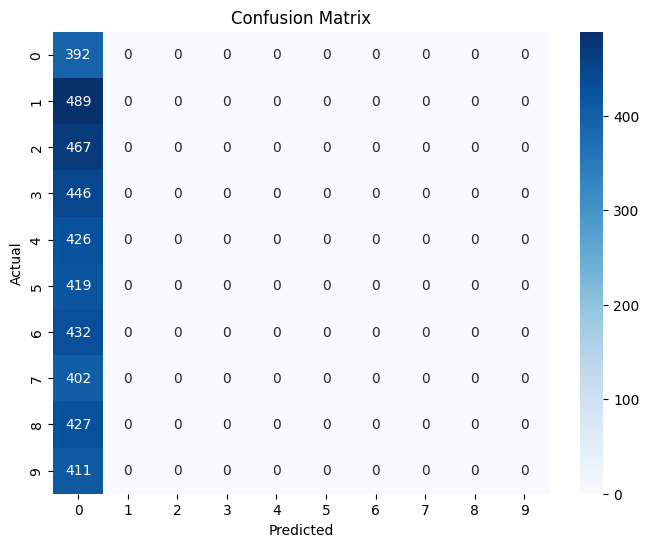

              precision    recall  f1-score   support

           0       0.09      1.00      0.17       392
           1       0.00      0.00      0.00       489
           2       0.00      0.00      0.00       467
           3       0.00      0.00      0.00       446
           4       0.00      0.00      0.00       426
           5       0.00      0.00      0.00       419
           6       0.00      0.00      0.00       432
           7       0.00      0.00      0.00       402
           8       0.00      0.00      0.00       427
           9       0.00      0.00      0.00       411

    accuracy                           0.09      4311
   macro avg       0.01      0.10      0.02      4311
weighted avg       0.01      0.09      0.02      4311



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

**Classification Report**

Hasil classification report menunjukkan bahwa:

- Kelas 0 memiliki recall = 1.00, artinya semua data angka 0 berhasil diprediksi sebagai 0

- Kelas 1–9 memiliki precision, recall, dan f1-score = 0, karena model tidak pernah memprediksi kelas tersebut

- Akurasi keseluruhan sebesar 9%, yang mendekati tebakan acak untuk klasifikasi 10 kelas

Peringatan (UndefinedMetricWarning) muncul karena beberapa kelas tidak memiliki prediksi sama sekali, sehingga nilai precision tidak dapat dihitung.

**Analisis Singkat Performa Model**

Hasil ini menunjukkan bahwa model ANN gagal mempelajari pola citra secara efektif dan mengalami kondisi model collapse, yaitu hanya memprediksi satu kelas dominan. Hal ini kemungkinan disebabkan oleh:

- Penggunaan MLP pada data citra kompleks tanpa ekstraksi fitur spasial

- Arsitektur model yang kurang optimal untuk data gambar

- Dataset citra yang lebih cocok ditangani oleh CNN dibandingkan ANN/MLP

#**VISUALISASI ACCURACY & LOSS**

#**GRAFIK ACCURACY**

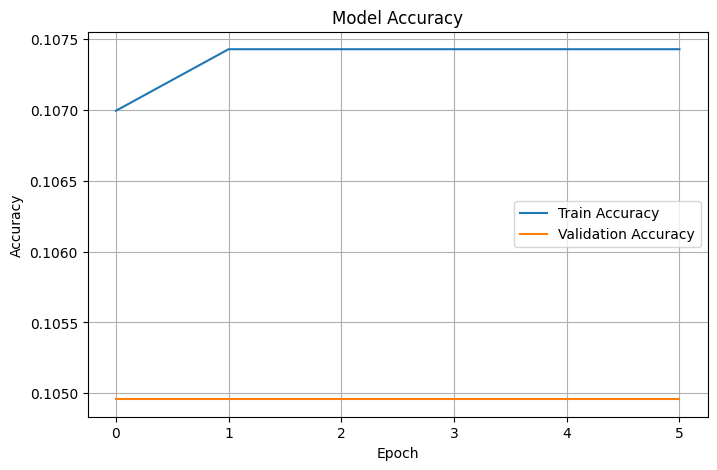

In [67]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Grafik ini menampilkan perbandingan akurasi data latih (training) dan akurasi data validasi pada setiap epoch selama proses training. Berdasarkan grafik, terlihat bahwa nilai akurasi tidak mengalami peningkatan signifikan dan cenderung stagnan di kisaran 10%.

Hal ini menunjukkan bahwa model tidak berhasil belajar dengan baik dari data citra yang diberikan. Nilai akurasi yang hampir sama antara training dan validation juga menandakan bahwa model tidak overfitting, namun justru underfitting, yaitu model terlalu sederhana atau kurang sesuai untuk menangani data citra.

#**Grafik Loss**

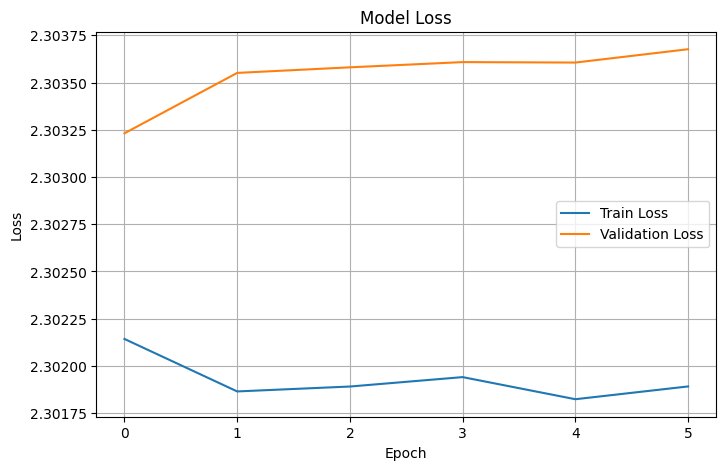

In [68]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)
plt.show()

Grafik loss menunjukkan perubahan nilai loss pada data latih dan data validasi selama proses training. Berdasarkan grafik, terlihat bahwa nilai loss training dan validation berada di sekitar 2.30 dan tidak mengalami penurunan yang signifikan.

Kondisi ini menunjukkan bahwa model tidak berhasil meminimalkan kesalahan prediksi, sehingga proses pembelajaran tidak berjalan dengan baik. Pola loss yang relatif datar dan mirip antara training dan validation menandakan bahwa model mengalami underfitting, bukan overfitting.

#**KESIMPULAN**

Berdasarkan hasil percobaan, penerapan Artificial Neural Network (ANN) dengan arsitektur MLP pada data citra angka tulisan tangan belum memberikan performa yang baik. Hal ini terlihat dari nilai akurasi yang hanya mencapai sekitar 9–10%, nilai loss yang stagnan di sekitar 2.30, serta confusion matrix yang menunjukkan model cenderung memprediksi hanya satu kelas.

Hasil ini menunjukkan bahwa MLP kurang efektif untuk menangani data citra, karena model tidak mampu menangkap pola spasial pada gambar. Berbeda dengan dataset tabular, di mana ANN/MLP biasanya dapat bekerja lebih optimal, data citra membutuhkan metode ekstraksi fitur yang lebih baik. Oleh karena itu, untuk klasifikasi citra seperti handwritten digits, model berbasis Convolutional Neural Network (CNN) lebih disarankan dibandingkan MLP.

Secara keseluruhan, praktikum ini menunjukkan perbedaan karakteristik dan tantangan antara pengolahan dataset citra dan dataset tabular, serta pentingnya pemilihan arsitektur model yang sesuai dengan jenis data yang digunakan.